# Случайные процессы. Прикладной поток.
## Практическое задание 3

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[СП17] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* При проверке некоторый код из вашего решения будет **проверяться автоматически**. Этот код вы должны скопировать в файл с названием `c3.N.py` и прислать вместе с решением. Что именно должно быть в этом файле, написано далее. Код должен корректно работать в Python 3.5 под Убунту.

--------------

Для выполнения задания потребуются следующие библиотеки: bs4, urllib, networkx. Следующими командами можно их поставить (Ubuntu):

sudo pip3 install beautifulsoup4

sudo pip3 install urllib2

sudo pip3 install networkx

--------------

## PageRank

#### История

(Взято с <a href='https://ru.wikipedia.org/wiki/PageRank'>Википедии</a>)

В 1996 году Сергей Брин и Ларри Пейдж, тогда ещё аспиранты Стэнфордского университета, начали работу над исследовательским проектом BackRub — поисковой системой по Интернету, использующей новую тогда идею о том, что веб-страница должна считаться тем «важнее», чем больше на неё ссылается других страниц, и чем более «важными», в свою очередь, являются эти страницы. Через некоторое время BackRub была переименована в Google. Первая статья с описанием применяющегося в ней метода ранжирования, названного PageRank, появилась в начале 1998 года, за ней следом вышла и статья с описанием архитектуры самой поисковой системы.

Их система значительно превосходила все существовавшие тогда поисковые системы, и Брин с Пейджем, осознав её потенциал, основали в сентябре 1998 года компанию Google Inc., для дальнейшего её развития как коммерческого продукта.

#### Описание

Введем понятие веб-графа. Ориентированный граф $G = (V, E)$ называется веб-графом, если 
* $V = \{url_i\}_{i=1}^n$ --- некоторое подмножество страниц в интернете, каждой из которых соответствует адрес $url_i$.
* Множество $E$ состоит из тех и только тех пар $(url_i, url_j)$, для которых на странице с адресом $url_i$ есть 
ссылка на $url_j$.

Рассмотрим следующую модель поведения пользователя. В начальный момент времени он выбирает некоторую страницу из $V$ в соответствии с некоторым распределением $\Pi^{(0)}$. Затем, находясь на некоторой странице, он может либо перейти по какой-то ссылке, которая размещена на этой странице, либо выбрать случайную страницу из $V$ и перейти на нее (damping factor). Считается, что если пользователь выбирает переход по ссылке, то он выбирает равновероятно любую ссылку с данной страницы и переходит по ней. Если же он выбирает переход не по ссылке, то он также выбирает равновероятно любую страницу из $V$ и переходит на ее (в частности может остаться на той же странице). Будем считать, что переход не по ссылке пользователь выбирает с некоторой вероятностью $p \in (0, 1)$. Соответственно, переход по ссылке он выбирает с вероятностью $1 - p$. Если же со страницы нет ни одной ссылки, то будем считать, что пользователь всегда выбирает переход не по ссылке.

Описанная выше модель поведения пользователя называется моделью PageRank. Нетрудно понять, что этой модели соответствует некоторая марковская цепь. Опишите ее.
* Множество состояний:  это $V$ , в каждый раз находимся на одной определенной странице
* Начальное распределение: Считаем, что страницы вначале выбираются равновероятно, поэтому: <br>
$$p_{i}(0) = \frac{1}{|V|}$$
$$\Rightarrow \Pi^{(0)} = (\frac{1}{|V|}, \frac{1}{|V|}, ..., \frac{1}{|V|})$$ <br>
Однако начальное распределение можно выбрать любым.
* Переходные вероятности:  <br>
Если $N_i > 0$: $$p_{i,j} = \frac{1 - p}{N_{i}}I((url_i, url_j) \in E) + \frac{p}{|V|}$$
Если $N_i = 0$: $$p_{i,j} = \frac{1}{|V|}$$ <br>
где $N_i$ - кол-во ссылок на странице i.

#### Вычисление

Данная марковская цепь является эргодической. Почему?

Из любой страницы можно за один шаг перейти в любую другую с ненулевой вероятностью: <br>
Рассмотрим $p_{i,j}$. Если страница $i$ ссылается на страницу $j$, то $p_{i,j} = \frac{1 - p}{N_{i}} + \frac{p}{|V|}$. <br>
Если страница $i$ не ссылается на страницу $j$, то $p_{i,j} = \frac{p}{|V|}$ или  $p_{i,j} = \frac{1}{|V|}$<br>
$\Rightarrow$ $\forall i, j : p_{i,j} \ne 0 $.  $\Rightarrow P^{n_0} = P^1$ состоит из положительных элементов. $\Rightarrow$ она эргодическая.
**--**

А это означает, что цепь имеет некоторое эргодическое распределение $\Pi$, которое является предельным и единственным стационарным. Данное распределение называется весом PageRank для нашего подмножества интернета.

Как вычислить это распределение $\Pi$ для данного веб-графа? Обычно для этого используют степенной метод (power iteration), суть которого состоит в следующем. Выбирается некоторое начальное распределение $\Pi^{(0)}$. Далее производится несколько итераций по формуле $\Pi^{(k)} = \Pi^{(k - 1)} P$, где $P$ --- матрица переходных вероятностей цепи, до тех пор, пока $\left|\left|\Pi^{(k)} - \Pi^{(k - 1)}\right|\right| > \varepsilon$. Распределение $\Pi^{(k)}$ считается приближением распредения $\Pi$.

**--**
Имеет ли смысл выполнять подобные итерации для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории?


Ранее мы поняли, что наша марковская цепь эргодична, а тогда по эргодической теореме для нее единственное стационарное распределение, является предельным, которое мы как раз приближаем с помощью метода power iteration. <br>
По определению стацонарное распределение $\Pi$ не зависит от начального распределения $\Pi^{(0)}$ : $\Pi = \Pi P$ <br>
Таким образом, при разных начальных распределениях мы получим один и тот же ответ.
**--**


А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

Если нам интересны вероятности оказаться на определенной странице в k-ый момент времени, то для этого там достаточно проделать всего лишь k итераций и найти $\Pi^{(k)}$ и доводить до сходимости не нужно. А вот если мы хотим узнать вероятность того, что пользователь за все время окажется на этой странице(в какой-то момент), то нам уже нужно предельное распределение $\Pi$
**--**


Какая верхняя оценка на скорость сходимости?

Из эргодической теоремы следует, что скорость сходимости : $$O((1 - \epsilon)^{n / n_0}) = O((1 - \epsilon)^{n})$$
где $$\epsilon = \min_{i, j} (P^{n_0})_{i, j} = \min_{i, j}p_{i, j}$$ <br>
Или, если рассматривать данный случай, то $\min_{i, j}p_{i, j} = \frac{p}{|V|}$ 
$$\Rightarrow O((1 - \frac{p}{|V|})^{n})$$

## Часть 1


In [7]:
import numpy as np
from scipy.stats import bernoulli
import networkx
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse
from time import sleep
from itertools import product
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

Реализуйте вычисление весов PageRank power-методом.

Реализовать может быть удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

In [2]:
def create_page_rank_markov_chain(links, damping_factor=0.15):
    ''' По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    '''

    links = np.array(links)
    N = links.max() + 1  # Число веб-страниц
    
    
    #Строим матрицу смежности

    #матрица смежности
    Matrix_links = np.zeros((N, N))
    #вспомогательный массив, в котором храним первый столбец links
    pages_with_link = links[:, 0]
    
    for i in range(N):
        #найдем массив страниц, на которые ссылается i-ая страница
        links_i = links[:,1][pages_with_link==i]
        
        Matrix_links[i, links_i] = 1
    
    
    #Построим массив N_i
    #Заметим, что N_i для определенного i это сумма чисел в i-ой строке матрице смежности
    N_i = np.sum(Matrix_links, axis=1)
    
    #массив вероятнотей перехода по ссылке для каждой страницы
    p_links = (1 - damping_factor) / N_i
    p_links[N_i == 0] = 0  #уберем бесконечности, которые получились когда N_i = 0
    
    
    #сначала добавим вероятности перехода по ссылке
    #для этого, каждую i-ую строку матрицы смежности нужно умножить на число p_links[i]
    #а для этого воспользуемся тем, что * - поэлементное умножение матриц и функцией np.tile
    prob_matrix = Matrix_links * (np.tile(p_links, (N, 1))).T
    
    #массив вероятнотей перехода не по ссылке для каждой страницы
    p_damping = np.ones((N,)) * (damping_factor / N)
    p_damping[N_i == 0] = 1.0 / N
    
    #добавим для каждой страницы свои вероятности перехода по телепортации
    prob_matrix = prob_matrix + (np.tile(p_damping, (N, 1))).T
    
    return prob_matrix
            
    
def page_rank(links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False):
    ''' Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) на |V|.
    '''
    
    prob_matrix = create_page_rank_markov_chain(links, 
                                                damping_factor=damping_factor)
    distribution_old = np.matrix(start_distribution)
    
    distribution = np.dot(distribution_old, prob_matrix)
    trace = [distribution_old, distribution]
    while np.linalg.norm(distribution - distribution_old) > tolerance:
        distribution_old = distribution
        distribution = np.dot(distribution, prob_matrix)
        trace.append(distribution)
    
    if return_trace:
        return np.array(distribution).ravel(), np.array(trace)
    else:
        return np.array(distribution).ravel()

**Автоматическая проверка**

Реализацию функций create_page_rank_markov_chain и page_rank скопируйте в файл с названием `c3.N.py` и вышлите на почту. Будет проверяться только корректность выдаваемых значений. Проверки на время работы не будет.

----------

Давайте посмотрим, как оно работает.
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [3]:
'''Пользуемся функциями:
np.nonzero, которая возвращает в данном случае два массива. Первый - первые индексы ненулевых элементов,
второй - вторые индексы
np.vstack, которая склеивает эти 2 массива в один двумерный размера (2, |E|)
и транспонируем, чтоб получить массив размера (|E|, 2)'''
def random_graph(n, p):
    return np.vstack(np.nonzero(bernoulli(p).rvs(size=(n, n)))).T

Теперь сгенерируем случайный граф и нарисуем его.

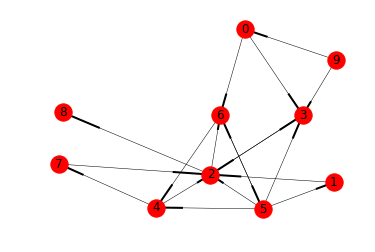

In [21]:
N, p = 10, 0.2
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

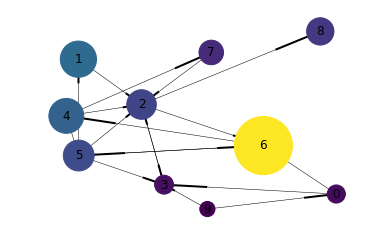

In [22]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

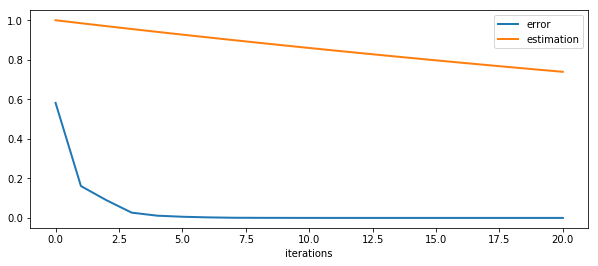

In [24]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

damping_factor=0.15

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - damping_factor / N)**x, 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Как видим значения верхней оценки скорости сходимости ограничивает сверху график ошибок, поэтому можно сказать, что верхняя оценка скорости сходимости, полученная из эргодической теоремы, действительно верна. <br>
Однако, как видим, эта оценка в некоторых случаях сильно улучшаема.

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

**Найдем зависимость скорости сходимости, а именно кол-во итераций(не оценка на скорость сходимости), от n**<br> 
Рассматриваем равномерное начальное распределение

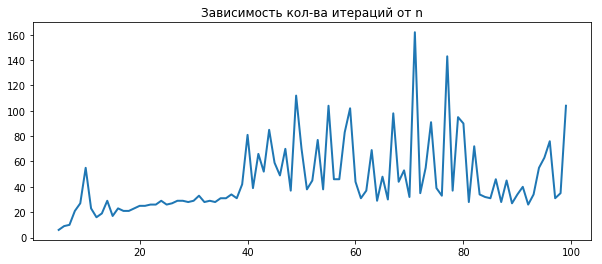

In [26]:
n = np.arange(5, 100, 1)
p = 0.2
edges = [random_graph(n[i], p) for i in range(len(n))]
start_distribution = [np.ones((1, n[i])) / n[i] for i in range(len(n))]

count_it = [len(page_rank(edges[i], start_distribution[i], return_trace=True, tolerance = 1 / np.exp(n[i]))[1])
            for i in range(len(edges))]

plt.figure(figsize=(10, 4))
plt.title("Зависимость кол-ва итераций от n")
plt.plot(n, count_it, lw=2)
plt.show()

Как видим в среднем кол-во итераций увеличивается с ростом n, что согласуется с полученной ранее верхней оценкой на скорость сходимости $O((1 - \frac{p}{n})^{k})$

**Найдем зависимость скорости сходимости, а именно кол-во итераций(не оценка на скорость сходимости), от p**<br>
Рассматриваем равномерное начальное распределение

33


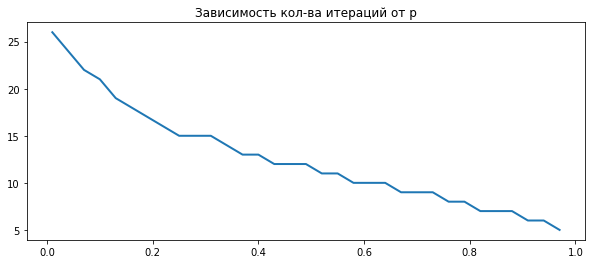

In [63]:
n = 20
p = 0.15
damp_factor = np.arange(0.01, 0.99, 0.03)
edges = random_graph(n, p)
start_distribution = np.ones((1, n)) / n
count_it = [len(page_rank(edges, start_distribution, return_trace=True, damping_factor=damp_factor[i])[1]) 
            for i in range(len(damp_factor))]

plt.figure(figsize=(10, 4))
plt.title("Зависимость кол-ва итераций от p")
plt.plot(damp_factor, count_it, lw=2)

plt.show()

Кол-во итераций уменьшается с ростом p, что согласуется с полученной ранее верхней оценкой на скорость сходимости $O((1 - \frac{p}{n})^{k})$

**Исследуем зависимость кол-ва итераций от начального распределения.**

Сначала рассмотрим равномерное начальное распределение.

Предельное распределение:  [ 0.04982882  0.0976168   0.05893728  0.0457859   0.05506067  0.07469152
  0.02356268  0.05093966  0.01383318  0.07472681  0.04524591  0.04569255
  0.05038705  0.03710528  0.02841624  0.04941757  0.03488935  0.06013192
  0.04470483  0.05902597]
Кол-во итераций:  18


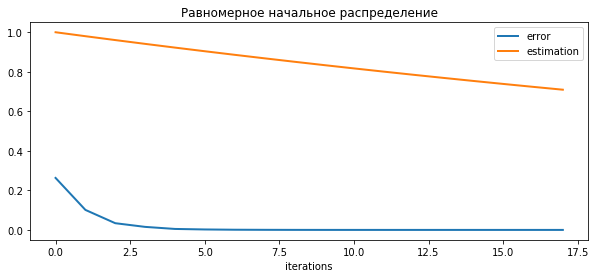

In [27]:
n = 20
p = 0.2
edges = random_graph(n, p)


start_distribution = np.ones((1, n)) / n

pr_distribution_1, pr_trace_1 = page_rank(edges, start_distribution, return_trace=True)
print("Предельное распределение: ", pr_distribution_1)
print("Кол-во итераций: ", len(pr_trace_1))

errors = np.abs(pr_trace_1 - pr_trace_1[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.title("Равномерное начальное распределение")
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - p / N)**x, 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Рассмотрим рандомное начальное распределение 1(рандомные вероятности, в сумме дающие 1)

Предельное распределение:  [ 0.04982882  0.09761679  0.05893728  0.0457859   0.05506067  0.07469152
  0.02356269  0.05093966  0.01383318  0.07472681  0.04524591  0.04569255
  0.05038705  0.03710529  0.02841624  0.04941757  0.03488935  0.06013191
  0.04470482  0.05902598]
Кол-во итераций:  21


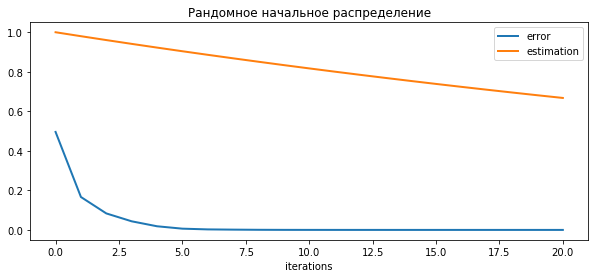

In [28]:
random_numbers = np.random.rand(n)
start_distribution = random_numbers / np.sum(random_numbers)

pr_distribution_2, pr_trace_2 = page_rank(edges, start_distribution, return_trace=True)
print("Предельное распределение: ", pr_distribution_2)
print("Кол-во итераций: ", len(pr_trace_2))

errors = np.abs(pr_trace_2 - pr_trace_2[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.title("Рандомное начальное распределение")
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - p / N)**x, 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Рассмотрим рандомное начальное распределение 2

Предельное распределение:  [ 0.04982882  0.09761677  0.05893729  0.0457859   0.05506066  0.07469153
  0.02356269  0.05093966  0.01383318  0.0747268   0.0452459   0.04569255
  0.05038707  0.03710528  0.02841625  0.04941756  0.03488936  0.06013191
  0.04470483  0.05902597]
Кол-во итераций:  19


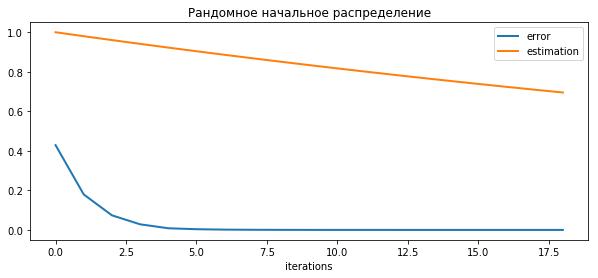

In [29]:
random_numbers = np.random.rand(n)
start_distribution = random_numbers / np.sum(random_numbers)

pr_distribution_3, pr_trace_3 = page_rank(edges, start_distribution, return_trace=True)
print("Предельное распределение: ", pr_distribution_3)
print("Кол-во итераций: ", len(pr_trace_3))

errors = np.abs(pr_trace_3 - pr_trace_3[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.title("Рандомное начальное распределение")
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - p / N)**x, 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Рассмотрим начальное распределение, в котором мы с вероятностью 1 поподаем в первую вершину и с вероятность 0 в остальные

Предельное распределение:  [ 0.04982883  0.09761678  0.05893728  0.0457859   0.05506067  0.07469152
  0.02356269  0.05093966  0.01383318  0.07472681  0.04524591  0.04569255
  0.05038705  0.03710529  0.02841624  0.04941757  0.03488936  0.0601319
  0.04470482  0.05902598]
Кол-во итераций:  24


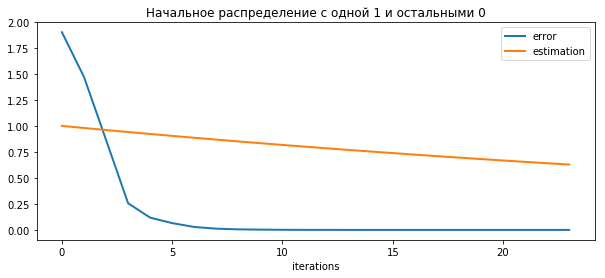

In [31]:
start_distribution = np.array([1] + [0]*(n - 1))

pr_distribution_4, pr_trace_4 = page_rank(edges, start_distribution, return_trace=True)
print("Предельное распределение: ", pr_distribution_4)
print("Кол-во итераций: ", len(pr_trace_4))

errors = np.abs(pr_trace_4 - pr_trace_4[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.title("Начальное распределение с одной 1 и остальными 0")
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - p / N)**x, 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Как видим, в данном случае вначале значения ошибки выше вершней оценки на скорость сходимости. Это объясняется тем, что в качестве константы в $O((1 - \frac{p}{n})^{k})$ при $k \rightarrow \inf$ берем 1, а при маленьких $k$ эта константа может быть любой.

Теперь сравним полученные предельные распределения. Для этого посмотрим на максимальную норму всех попарных разниц 

In [32]:
difference_1_2 = np.linalg.norm(pr_distribution_1 - pr_distribution_2)
difference_1_3 = np.linalg.norm(pr_distribution_1 - pr_distribution_3)
difference_1_4 = np.linalg.norm(pr_distribution_1 - pr_distribution_4)
difference_2_3 = np.linalg.norm(pr_distribution_2 - pr_distribution_3)
difference_2_4 = np.linalg.norm(pr_distribution_2 - pr_distribution_4)
difference_3_4 = np.linalg.norm(pr_distribution_3 - pr_distribution_4)
print("Попарные разницы между полученными предельными распределениями для разных начальных распределений")
print(difference_1_2, difference_1_3, difference_1_4, difference_2_3, difference_2_4, difference_3_4, sep = '\n')

Попарные разницы между полученными предельными распределениями для разных начальных распределений
3.0738380143e-08
4.23077125446e-08
3.69303256543e-08
4.0259246307e-08
7.29640111755e-09
3.87889866401e-08


Как видим предельное значение, найденное для разных начальных распределений получилось почти одинаковым. Отличие норм между ними меньше выбранного значения tolerance $ = 10^{-7}$.
Однако, скорость сходимости при разных начальных распределениях разная

Для наглядности построим графики ошибок для разных начальных распределений на одном графике

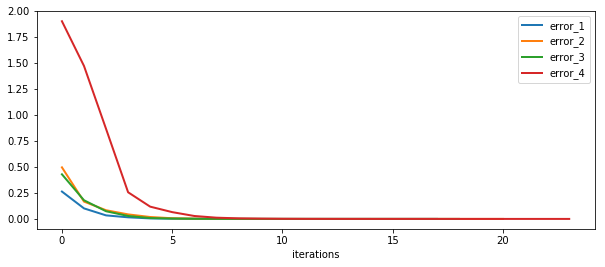

In [33]:
damping_factor=0.15

errors_1 = np.abs(pr_trace_1 - pr_trace_1[-1]).sum(axis=(1, 2))
errors_2 = np.abs(pr_trace_2 - pr_trace_2[-1]).sum(axis=(1, 2))
errors_3 = np.abs(pr_trace_3 - pr_trace_3[-1]).sum(axis=(1, 2))
errors_4 = np.abs(pr_trace_4 - pr_trace_4[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(errors_1)), errors_1, lw=2, label='error_1')
plt.plot(np.arange(len(errors_2)), errors_2, lw=2, label='error_2')
plt.plot(np.arange(len(errors_3)), errors_3, lw=2, label='error_3')
plt.plot(np.arange(len(errors_4)), errors_4, lw=2, label='error_4')
plt.legend()
plt.xlabel('iterations')
plt.show()

Для наглядности также построим график логарифма ошибки.

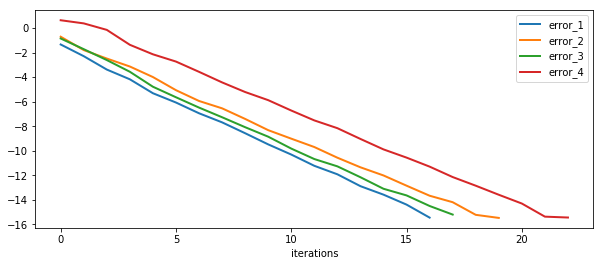

In [34]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(errors_1)), np.log(errors_1), lw=2, label='error_1')
plt.plot(np.arange(len(errors_2)), np.log(errors_2), lw=2, label='error_2')
plt.plot(np.arange(len(errors_3)), np.log(errors_3), lw=2, label='error_3')
plt.plot(np.arange(len(errors_4)), np.log(errors_4), lw=2, label='error_4')
plt.legend()
plt.xlabel('iterations')
plt.show()

Еще раз убеждаемся в том, что скорость сходимости при разных начальных распределениях разная.

**Теперь рассмотрим некоторые неслучайные графы. <br>
Сначала рассмотрим граф состоящий из трех сильно связных компонент и начальным распределением, состоящим из одной единицы**

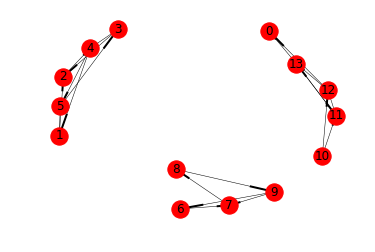

In [35]:
edges = np.array([[1, 2], [1, 5], [2, 4], [3, 2], [3, 4], [4, 1], [4, 5] ,[5, 3], [6, 7], [7, 8], [8, 9]
                  ,[9, 6], [9, 7], [10, 11], [10, 12], [11, 12], [12, 0], [12, 13], [13, 0], [11, 13], [13, 11]])


G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

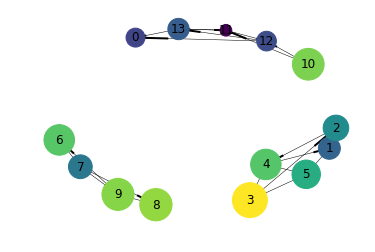

In [36]:
start_distribution = [0]*4 + [1] + [0]*9
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как видим, вероятность того, что мы все таки попадем в другую компоненту и пройдем там по страницам немала.

**Теперь посмотрим на полный граф**

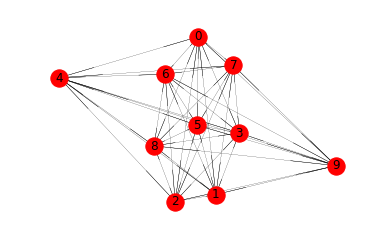

In [101]:
edges = random_graph(10, 1)
G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.1)

Будем рассматривать 2 начальных распределения: равномерное и с одной единицей.<br>
Как утверждалось ранее, ожидаем в обоих случаях увидеть один и тот же результат

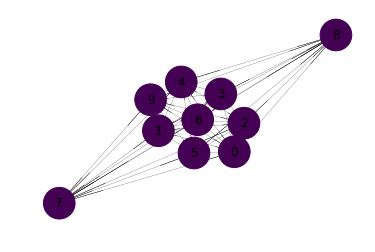

In [102]:
start_distribution = [1] + [0]*9
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.1, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

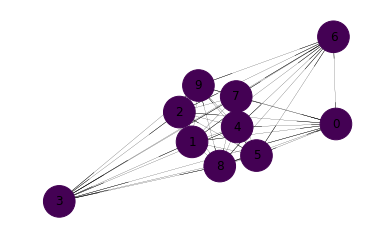

In [103]:
start_distribution = np.ones((1, 10)) / 10
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.1, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)


Для полного графа, как и ожидалось, веса PageRank получились одинаковыми для всех страниц, так как все страницы имеют симметричное положение. <br>
Также еще раз убедились в независимости результата от начального распределения.

**Теперь рассмотрим веб-граф, в котором есть полный подграф **

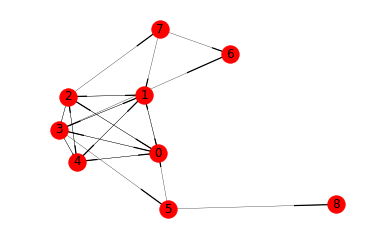

In [37]:
edges=list(random_graph(5, 1))
edges = np.array(edges + [[5, 0], [3, 5], [5, 8], [2, 7], [3, 6], [7, 6], [7, 1]])

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.3)

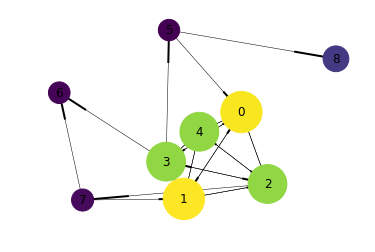

In [38]:
start_distribution = np.ones((1, 9)) / 9
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)



Вероятность того, что пользователь посетит страницы, ссылающиеся друг на друга(образующие полный подграф) намного больше, чем вероятность посещения остальных страниц. Однако в данном случае такая разница также обусловлена маленьким кол-вом страниц. Если бы граф был больших размеров, а полный подграф меньших, то картина была бы совсем другой.

## Часть 2

В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [39]:
def load_links(url, sleep_time=1, attempts=5, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

**Для начала выберем небольшой сайт: http://pythonworld.ru/numpy .**

In [40]:
urls = ['http://pythonworld.ru/numpy']
site = get_site(urls[0])
links = []

N = 30
#вершины, которые не связаны с первыми N не попадут в urls
for i in range(N):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

Визуализируем полученный граф

Количество рассматриваемых страниц 276
Количество ссылок 1542


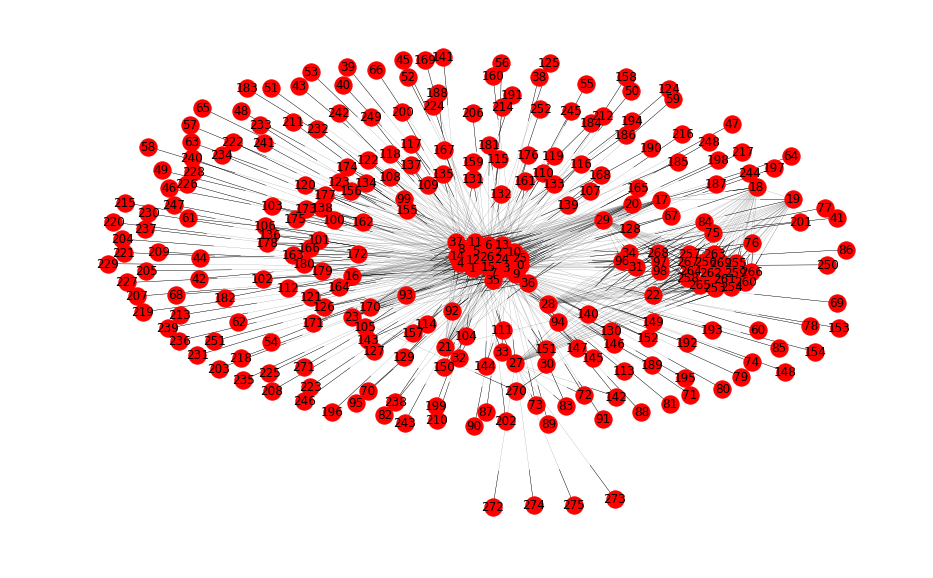

In [41]:
print("Количество рассматриваемых страниц", len(urls))
print("Количество ссылок", len(links))
G = networkx.DiGraph()
G.add_edges_from(links)
plt.figure(figsize={16, 10})
plt.axis('off')
networkx.draw_networkx(G, width=0.1)

Посчитаем PageRang для этого графа и нарисуем его, сделав размер вершин пропорциональным весу PageRank.<br>
Вероятность телепортации оставим по умолчанию

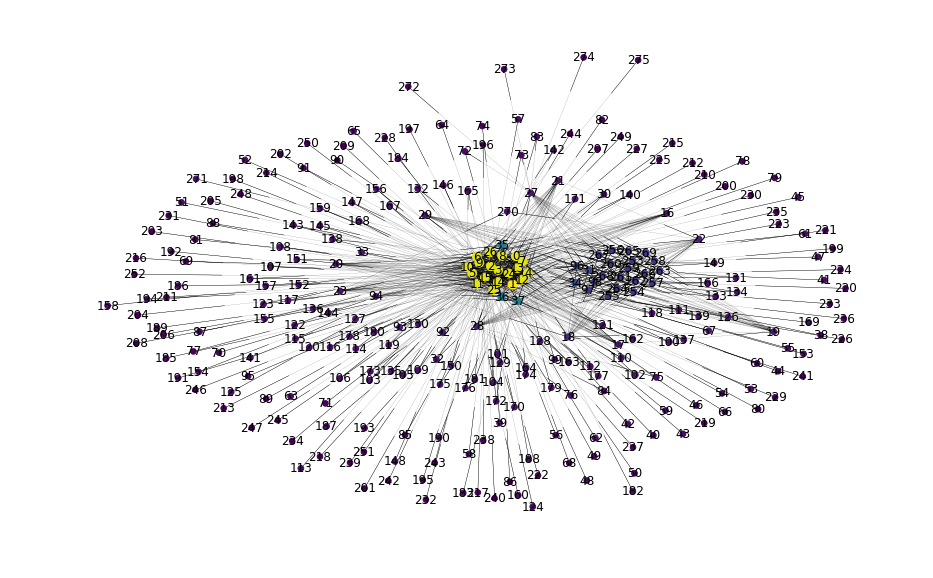

In [47]:
N = len(urls)
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(links, start_distribution, tolerance=1e-13)

size_const = 10 ** 4
plt.figure(figsize = (16, 10))
plt.axis('off')
networkx.draw_networkx(G, width=0.1, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Постром гистограмму весов

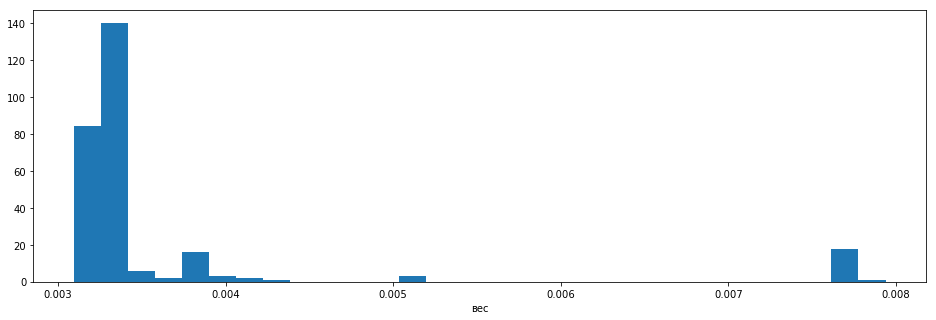

In [48]:
plt.figure(figsize=(16, 5))
plt.hist(pr_distribution, bins=30)
plt.xlabel('вес')
plt.show()

Для наглядности, построим также график логарифма весов

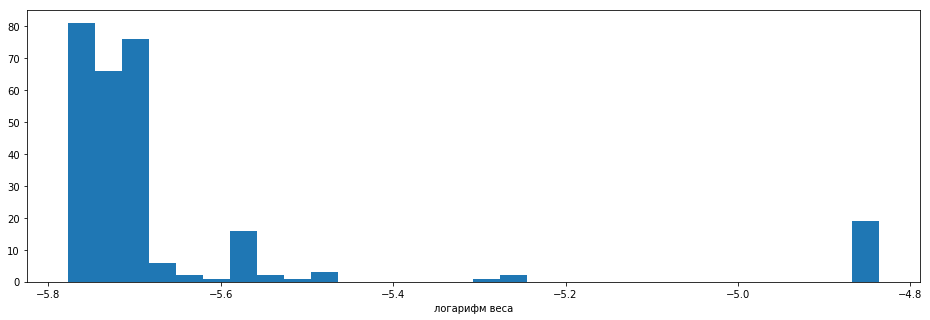

In [49]:
plt.figure(figsize=(16, 5))
plt.hist(np.log(pr_distribution), bins=30)
plt.xlabel('логарифм веса')
plt.show()

Как видим есть небольшое кол-во страниц сильно отличающихся своим весом от остальных, однако почти вся часть страниц имеет примерно одинаковый очень маленький PageRank

Выберем 20 страниц с наибольшим весом

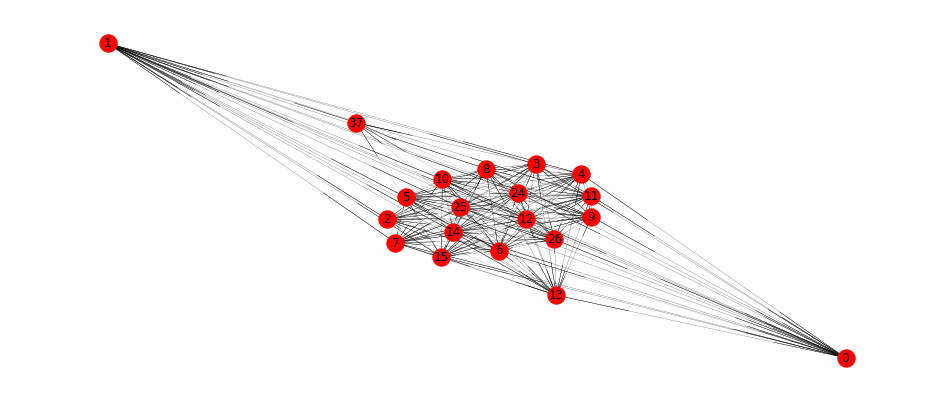

In [50]:
big_pages = (np.argsort(pr_distribution))[-20:]

links_big_pages = []
for link in links:
    if (link[0] in big_pages) and (link[1] in big_pages):
        links_big_pages.append(link)


G = networkx.DiGraph()
G.add_edges_from(links_big_pages)
plt.figure(figsize={16, 7})
plt.axis('off')
networkx.draw_networkx(G, width=0.1)


Данный подграф имеет большое кол-во ребер и концетрация ребер сильно больше, чем в оставшейся части исходного графа.<br> Также он сильно связный и очень похож на полный, а сильная связность сильно увеличивает вероятность того, что рано или поздно мы все-таки посетим страницу, принадлежащую этому подграфу.

Что это за страницы?

In [51]:
for i in big_pages[::-1]:
    print(urls[i])

http://pythonworld.ru/
http://pythonworld.ru/numpy
http://pythonworld.ru/novosti-mira-python
http://pythonworld.ru/gui
http://pythonworld.ru/osnovy
http://pythonworld.ru/primery-programm
http://pythonworld.ru/tipy-dannyx-v-python
http://pythonworld.ru/moduli
http://pythonworld.ru/obrabotka-dannyx
http://pythonworld.ru/web
http://pythonworld.ru/video
http://pythonworld.ru/vacancies
http://pythonworld.ru/samouchitel-python
http://pythonworld.ru/karta-sajta
http://pythonworld.ru/contribute
http://pythonworld.ru/python-knigi
http://pythonworld.ru/adv
http://pythonworld.ru/bookshop
http://pythonworld.ru/kursy
http://pythonworld.ru/kursy/netology-2017.html


Видим что среди них есть главная страница сайта,что ожидаемо(ссылка на главную страницу есть на многих других страницах). Причем именно она имеет самый большой PageRank<br>
Также есть 2 ссылки про курсы, которые нам предлагают пройти(также очевидно, что на многих страницах сайта будет упоминание об этих курсах)<br>
Некоторые из страниц представляют собой главные страницы подразделов сайта, как например http://pythonworld.ru/numpy. <br>
Страница про вакансии и страница магазина книг тоже очевидным образом попадают в 20 с наивысшим весом

**Теперь выберем более крупные сайты.**

Первый сайт: http://bashneft.ru

In [55]:
urls = ['http://bashneft.ru']
site = get_site(urls[0])
links = []

N = 70
for i in range(N):
    try:
        links_from_url = load_links(urls[i], sleep_time=0.5)
        #хотим переходить по ссылкам только этого сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        for j in range(len(links_from_url)):
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass

Посмотрим как выглядит данный веб-граф

Количество рассматриваемых страниц 1028
Количество ссылок 2913


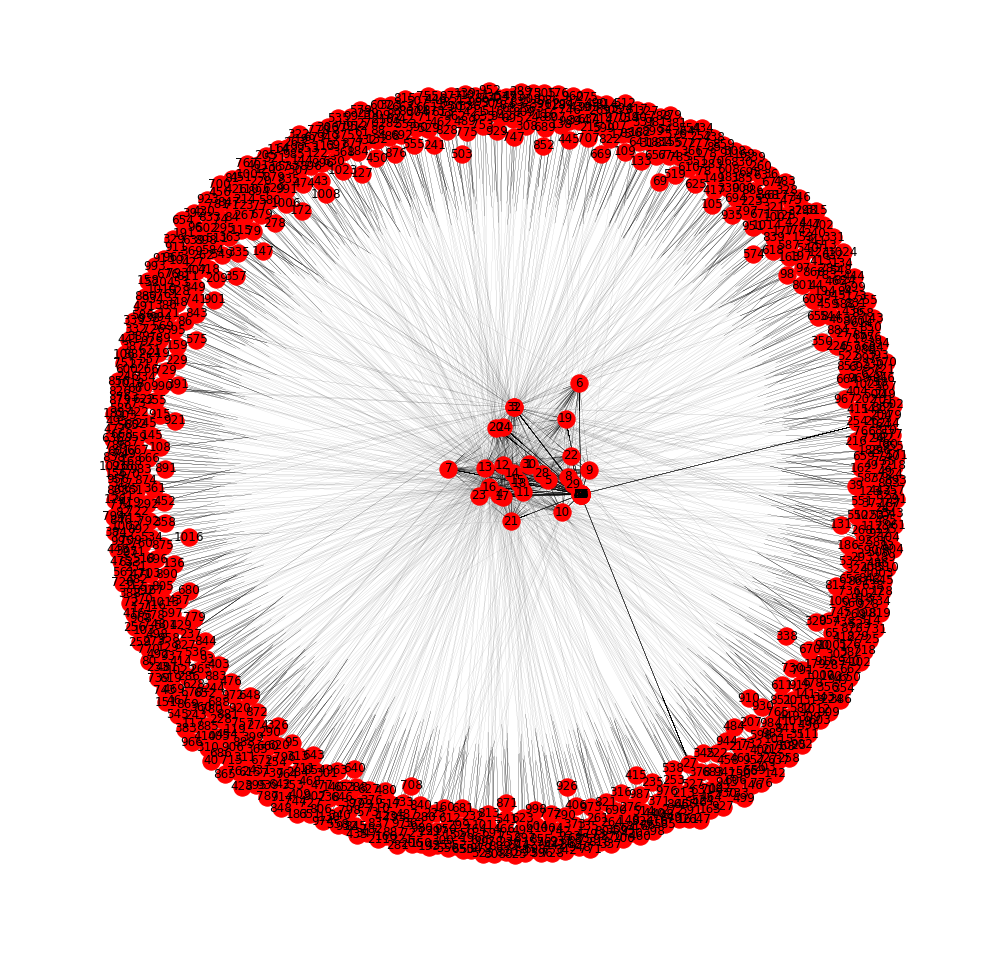

In [53]:
print("Количество рассматриваемых страниц", len(urls))
print("Количество ссылок", len(links))
G = networkx.DiGraph()
G.add_edges_from(links)
plt.figure(figsize=(17, 17))
plt.axis('off')
networkx.draw_networkx(G, width=0.05)

Аналогично проделанному ранее построим веб-граф, в котором отразим веса страниц. Опять считаем, что начальное распределение равномерное. <br>
Также построим гистограмму весов

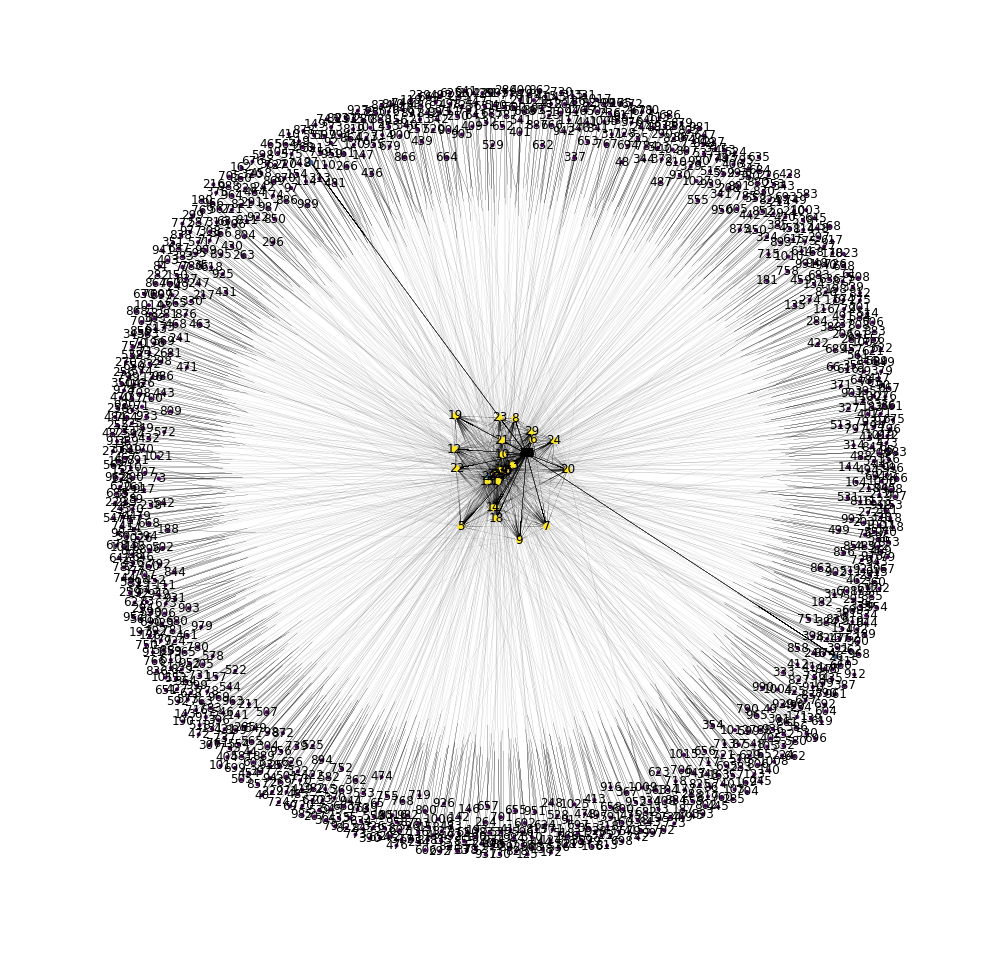

In [54]:
N = len(urls)
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(links, start_distribution, tolerance=1e-13)

size_const = 10 ** 4
plt.figure(figsize = (17, 17))
plt.axis('off')
networkx.draw_networkx(G, width=0.05, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как видим из данного веб-графа больший вес имеет страницы более близкие к главной(стартовой) странице

Построим гистограммы весов и логарифма веса

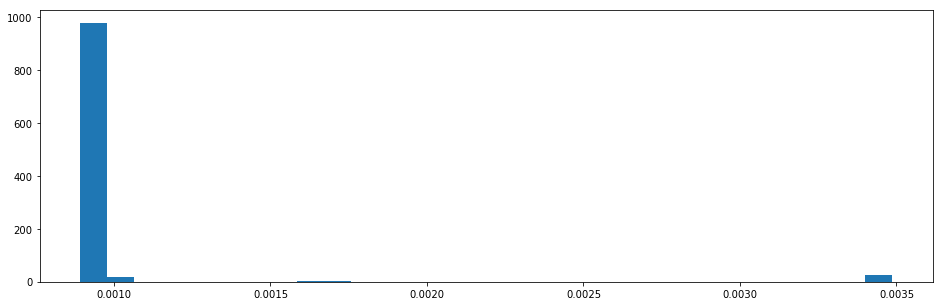

In [154]:
plt.figure(figsize=(16, 5))
plt.hist(pr_distribution, bins=30)
plt.xlabel('вес')
plt.show()

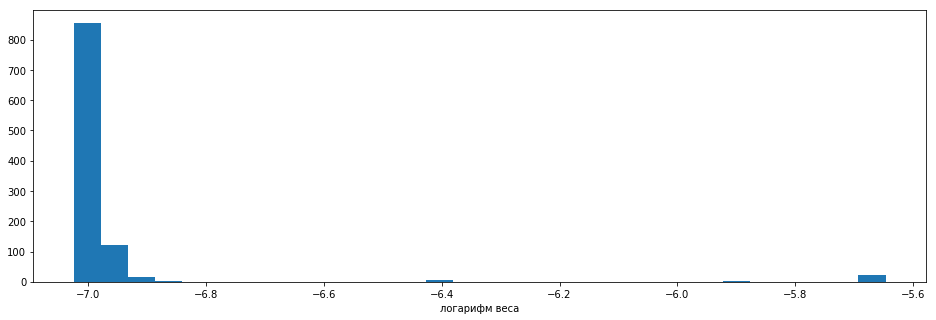

In [57]:
plt.figure(figsize=(16, 5))
plt.hist(np.log(pr_distribution), bins=30)
plt.xlabel('логарифм веса')
plt.show()

Гисторгаммы в обоих примерах получились похожими, что говорит нам о том, что почти на всех сайтах лишь небольшое число страниц имеет большой PageRank, а остальные страницы имеют примерно одинаковый маленький вес.

Рассматриваем 50 страниц с самым большим весом

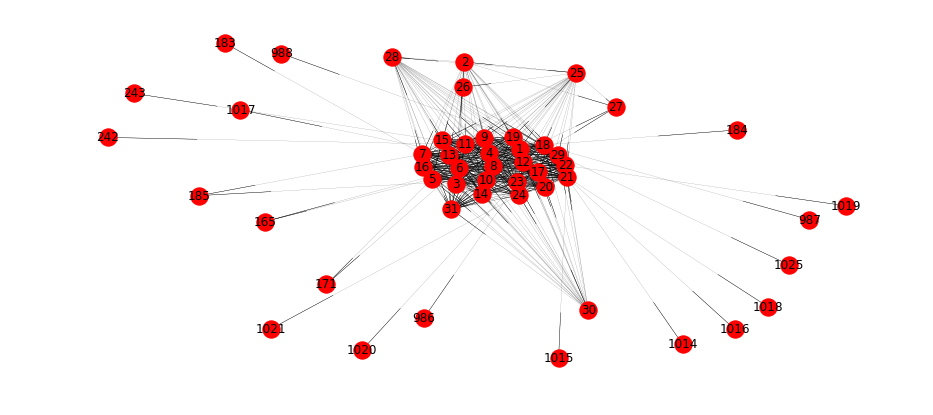

In [162]:
big_pages = (np.argsort(pr_distribution))[-50:]

links_big_pages = []
for link in links:
    if (link[0] in big_pages) and (link[1] in big_pages):
        links_big_pages.append(link)


G = networkx.DiGraph()
G.add_edges_from(links_big_pages)
plt.figure(figsize={16, 7})
plt.axis('off')
networkx.draw_networkx(G, width=0.1)



Что это за страницы? Выведем топ 15

In [173]:
for i in big_pages[-15:]:
    print(urls[i])

http://bashneft.ru/company/
http://bashneft.ru/company/career/
http://bashneft.ru/company/contacts/
http://bashneft.ru/company/warning/
http://bashneft.ru/corporate/
http://bashneft.ru/corporate/directors/
http://bashneft.ru/insiders/
http://bashneft.ru/corporate/charter/
http://bashneft.ru/disclosure/
http://bashneft.ru/disclosure/annual/
http://bashneft.ru/disclosure/quarterly/
http://bashneft.ru/disclosure/finance-results/
http://bashneft.ru/disclosure/facts/
http://bashneft.ru/disclosure/prospectus/
http://bashneft.ru/corporate/management/


Посмотрев на сайт можно понять, что,в основном, это главные страницы основных подразделений сайта, таких как "О компании", "Корпоративное управление" и "Информация для акционеров"

**Второй сайт: http://www.rbc.ru. Причем теперь не будем запрещать переходы на другие сайты**

In [59]:
urls = ['http://www.rbc.ru']
site = get_site(urls[0])
links = []



N = 60
for i in range(N):
    try:
        links_from_url = load_links(urls[i], sleep_time=0.5)
        
        for j in range(len(links_from_url)):
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass

Разобьем страницы по сайтам, которым они принадлежат. 

In [60]:
sites = dict()
colors_site = []
max_cur_color = 0

for url in urls:
    if get_site(url) in sites.keys():
        colors_site.append(sites[get_site(url)])
    else:
        max_cur_color += 1
        sites[get_site(url)] = max_cur_color
        colors_site.append(sites[get_site(url)]) 

Нарисуем получившийся веб-граф

Количество рассматриваемых страниц: 2315
Количество ссылок: 11285


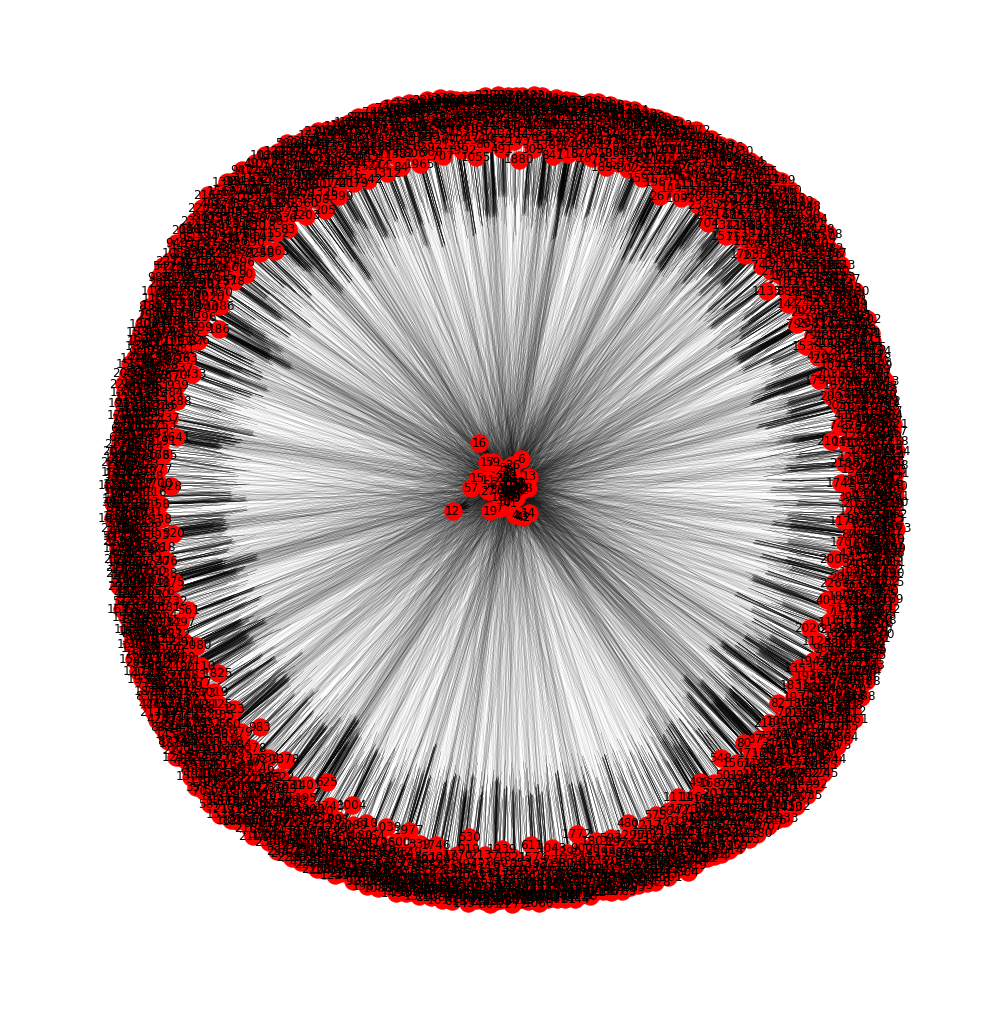

In [61]:
print("Количество рассматриваемых страниц:", len(urls))
print("Количество ссылок:", len(links))
G = networkx.DiGraph()
G.add_edges_from(links)
plt.figure(figsize={18, 17})
plt.axis('off')
networkx.draw_networkx(G, width=0.05)

Теперь нарисуем веб-граф в соответствии с весами страниц

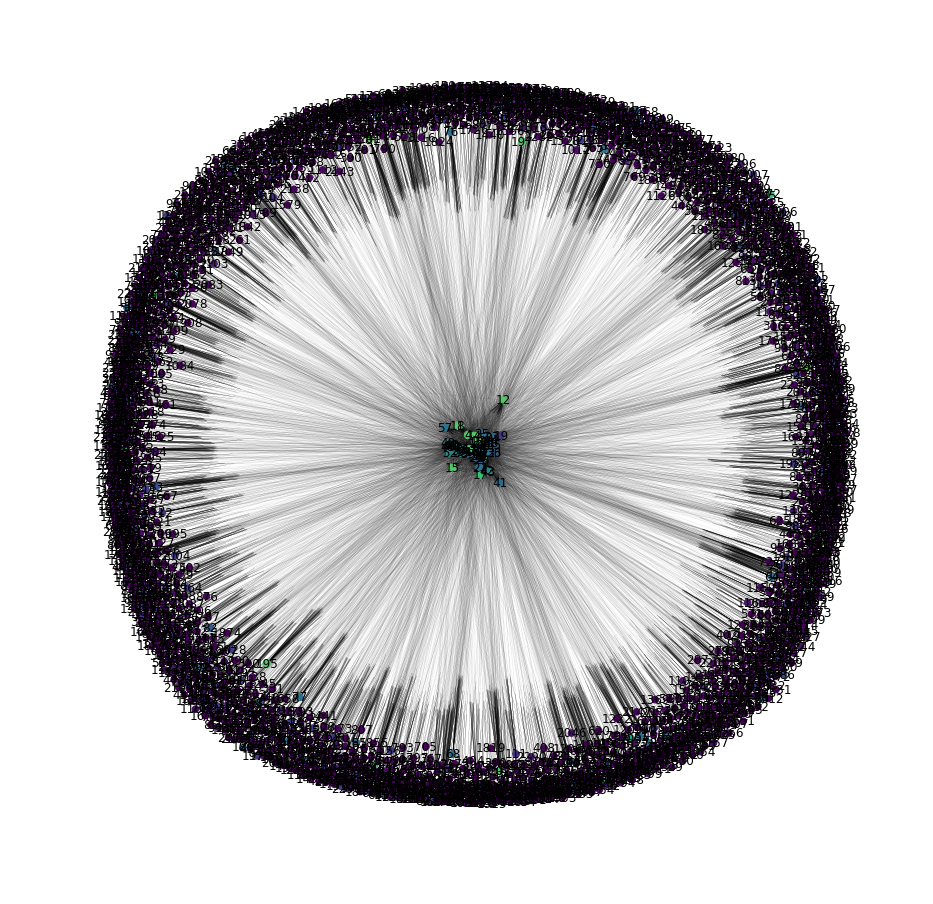

In [62]:
N = len(urls)
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(links, start_distribution, tolerance=1e-13)

size_const = 10 ** 5
plt.figure(figsize = (16, 16))
plt.axis('off')
networkx.draw_networkx(G, width=0.03, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Для более понятной картины нарисуем то же самое без номеров вершин.

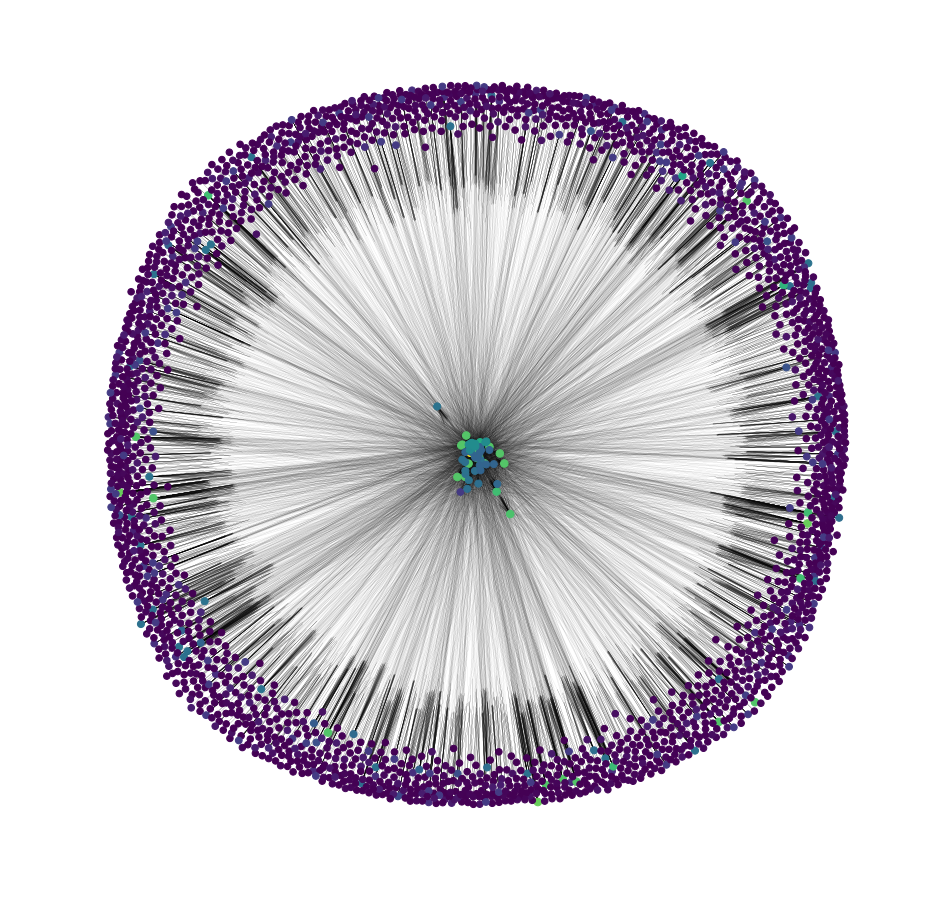

In [63]:
size_const = 10 ** 5
plt.figure(figsize = (16, 16))
plt.axis('off')
networkx.draw_networkx(G, with_labels = False, width=0.03, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

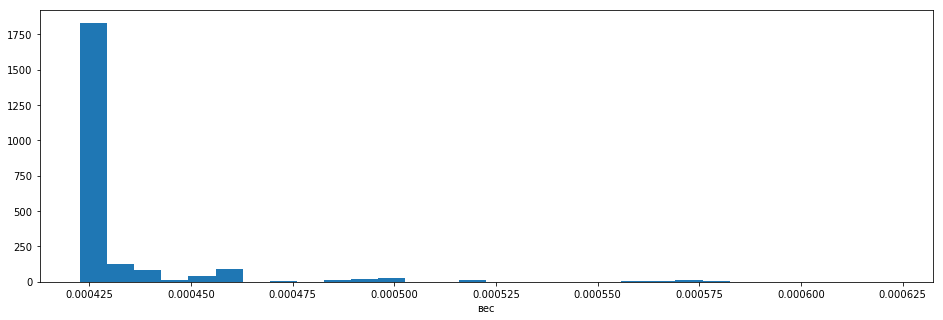

In [64]:
plt.figure(figsize=(16, 5))
plt.hist(pr_distribution, bins=30)
plt.xlabel('вес')
plt.show()

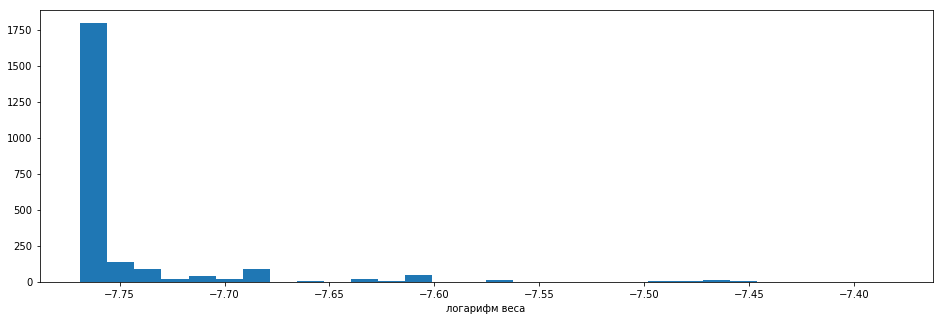

In [65]:
plt.figure(figsize=(16, 5))
plt.hist(np.log(pr_distribution), bins=30)
plt.xlabel('логарифм веса')
plt.show()

На гистограмме снова видим похожую картину

А теперь снова нарисуем веб-граф, в котором размеры вершин будут пропорциональны весу страницы, только теперь цвета вершин будут определятся сайтом, которому они принадлежат

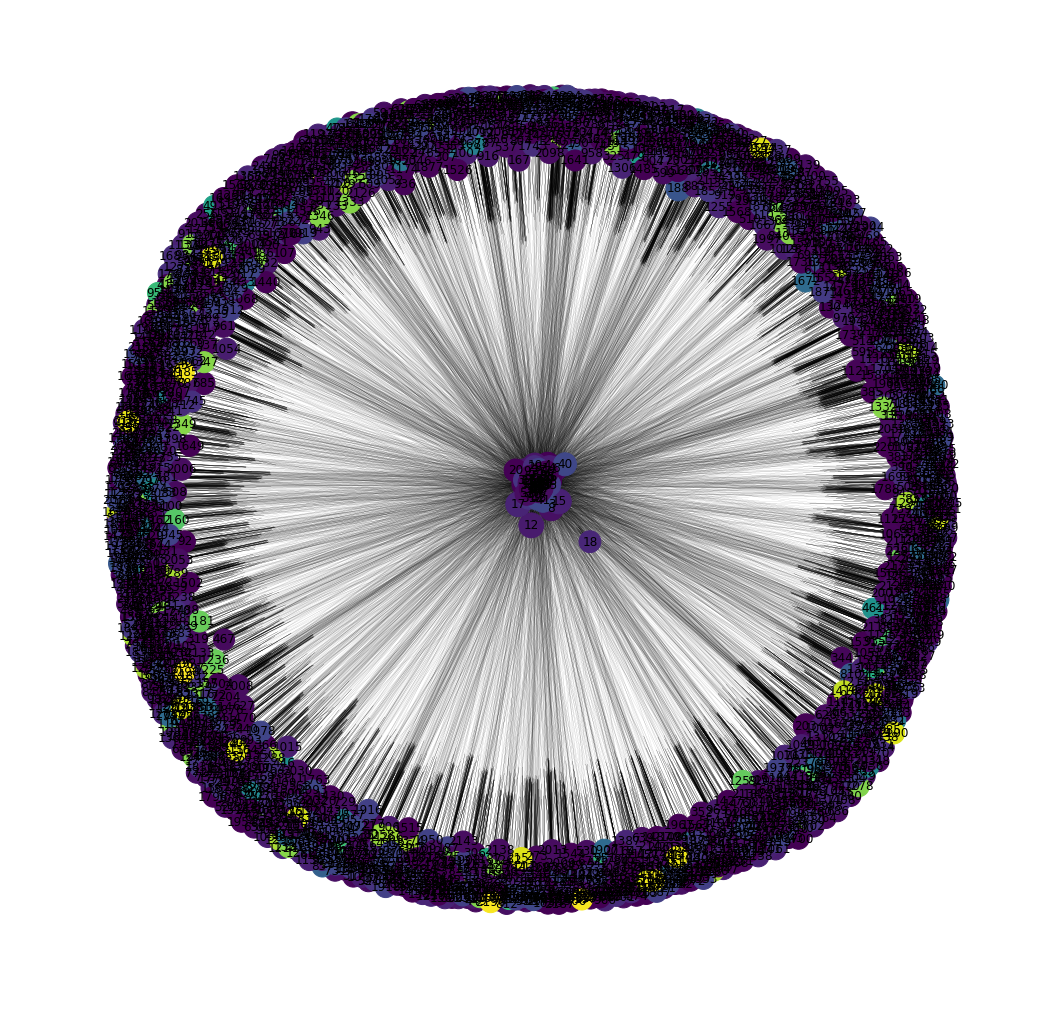

In [272]:
size_const = 10 ** 6
plt.figure(figsize = (18, 18))
plt.axis('off')
networkx.draw_networkx(G, width=0.05, node_size=size_const * pr_distribution,
                       node_color=np.array(colors_site) / np.max(colors_site))

Опять нарисуем граф без номеров вершин.

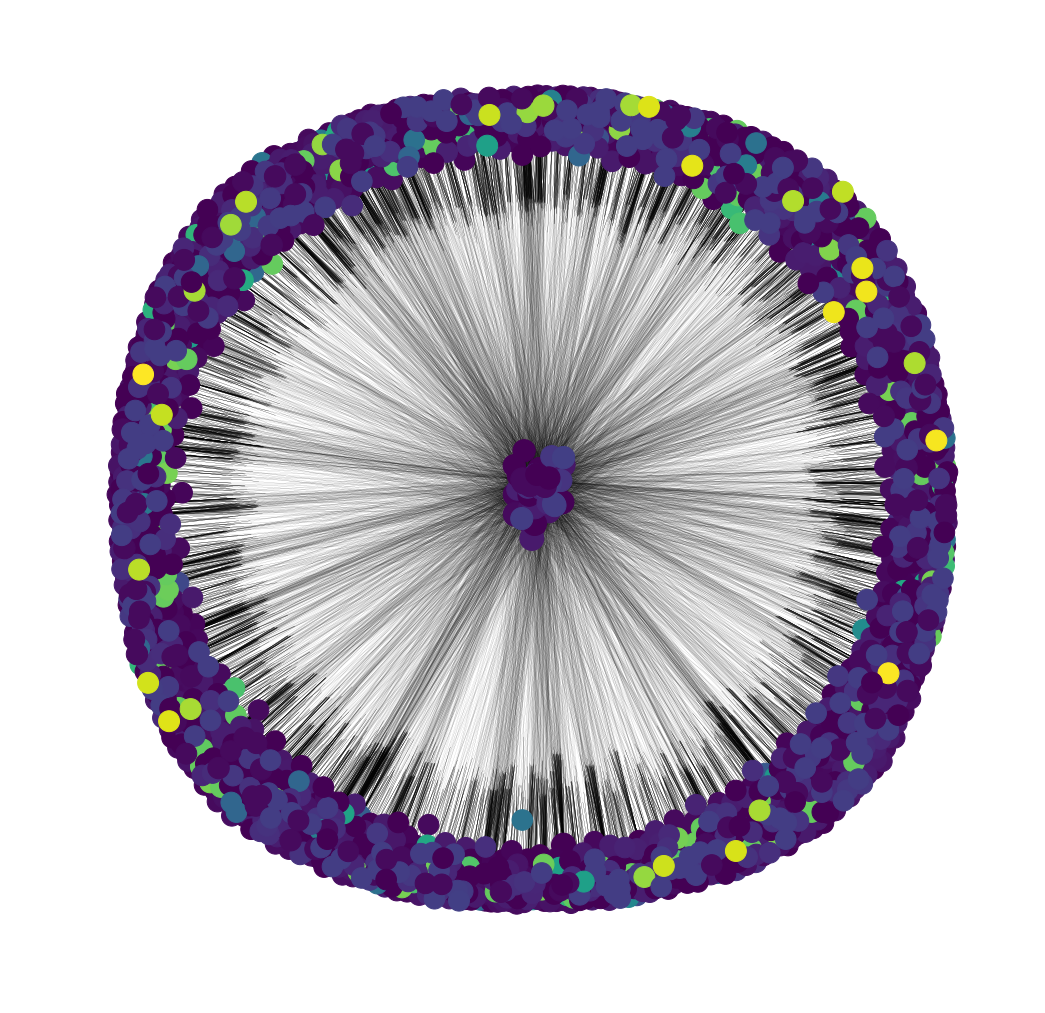

In [66]:
size_const = 10 ** 6
plt.figure(figsize = (18, 18))
plt.axis('off')
networkx.draw_networkx(G, with_labels = False, width=0.05, node_size=size_const * pr_distribution,
                       node_color=np.array(colors_site) / np.max(colors_site))

Как видим, разных сайтов получилось немало. Также судя по размерам вершин большой PageRank имеет страницы не только с сайта www.rbc.ru. 

Лучше возьмем 150 страниц, чтоб получить более адекватную картину

In [275]:
max_urls = 150
colors_site = colors_site[:max_urls]

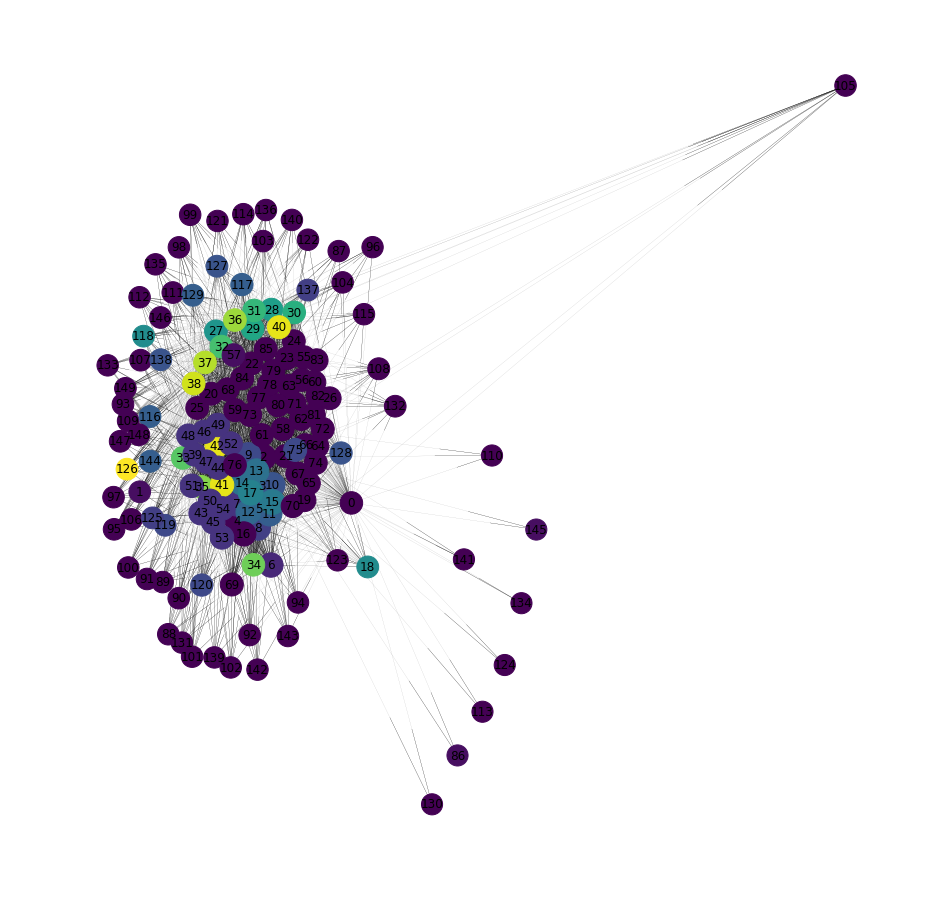

In [276]:
pr_distribution_sm = pr_distribution.copy()[:max_urls]
size_const = 10 ** 6
plt.figure(figsize = (16, 16))
plt.axis('off')
new_links = []
for link in links:
    if link[0] < max_urls and link[1] < max_urls:
        new_links.append(link)
G2 = networkx.DiGraph()
G2.add_edges_from(new_links)
networkx.draw_networkx(G2, width=0.05, node_size=size_const * pr_distribution_sm,
                       node_color=np.array(colors_site) / np.max(colors_site))

Темно-феолетовый цвет - страницы на сайте www.rbc.ru <br>
Также на нарисованном графе присутствуют сайты cash.rbc.ru , www.autonews.ru, vo.rbc.ru, www.cnews.ru, nsk.rbc.ru, pink.rbc.ru, style.rbc.ru, biztorg.ru, sport.rbc.ru и несколько других. <br>
Как и ожидалось, большую часть все-таки занимает www.rbc.ru. <br>
Также заметим, что многие страницы с других сайтов имеют также большой PageRank(судя по размеру), то есть вероятность того, что мы перейдем с исходного www.rbc.ru на другие сайты немала.

Теперь возьмем 100 страниц с самый большим PageRank и посмотрим с каких они сайтов

In [297]:
big_pages = (np.argsort(pr_distribution))[-70:]

top_sites = set()

for i in big_pages:
    top_sites.add(get_site(urls[i]))

for elem in top_sites:
    print(elem)

biztorg.ru
www.cnews.ru
www.rbcholding.ru
tv.rbc.ru
quote.rbc.ru
loveplanet.ru
rbc.ru
marketing.rbc.ru
www.youtube.com
sport.rbc.ru
cash.rbc.ru
www.rbc.ru
bc.rbc.ru
www.autonews.ru
vk.com
realty.rbc.ru
static.feed.rbc.ru
www.odnoklassniki.ru
www.public.ru
www.nic.ru
facebook.com
www.rbcplus.ru
www.liveinternet.ru
style.rbc.ru
twitter.com


Даже в топ-70 попали страницы с 25 разных сайтов. Как видим многие из них очень известные ссайты и ссылки на них мы часто встречаем на разных страницах в интернете, с чем и связан из большой PageRank (правда откуда там взялся сайт для онлайн-знакомств love-planet - хороший вопрос :)

Мы научились считать PageRank для веб-графа и на практике увидели несколько его свойств: <br>
Он не зависит от начального распределения, кол-во итераций для его нахождения(скорость сходимости) уменьшается при увеличении damping_factor и увеличивается при увеличении n. 
Также поняли, что PageRank это по сути релевантность страницы.